#### This notebook applies a random forest ML algorithm to the pollen and weather data from Richmond, VA
We are looking at data from Richmond only, with SPI included.  Shorter file.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the CSV and Perform Basic Data Cleaning

In [6]:
### Data cleaning and merging was accomplished in the Preparing Richmond Data notebook, so straight read of data here.
df = pd.read_csv("pollen_wx_richmond.csv")
df.head()

,Unnamed: 0,Tree,Mold,Grass,Ragweed,total-pol,SPI,LATITUDE,LONGITUDE,ELEVATION,...,PRCP,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WESD,WESF,WV03
0,2010-02-22,0.0,630.0,0.0,0.0,0.0,0.491429,37.628435,-77.379253,57.475,...,0.1175,41.50,53.25,29.75,36.5,NaN,180.0,0.0,NaN,NaN
1,2010-02-23,0.0,450.0,0.0,0.0,0.0,0.428571,37.628435,-77.379253,57.475,...,0.0775,42.75,50.75,34.75,40.5,NaN,155.0,0.0,NaN,NaN
2,2010-02-24,0.0,675.0,0.0,0.0,0.0,0.365714,37.628435,-77.379253,57.475,...,0.0825,38.25,44.25,32.25,35.0,NaN,10.0,0.0,NaN,NaN
3,2010-02-25,0.0,765.0,0.0,0.0,0.0,0.302857,37.628435,-77.379253,57.475,...,0.0500,38.00,44.25,31.75,36.0,NaN,305.0,0.0,NaN,NaN
4,2010-03-02,0.0,420.0,0.0,0.0,0.0,-1.068571,37.628435,-77.379253,57.475,...,0.1250,39.50,46.25,32.75,33.5,NaN,190.0,0.0,NaN,NaN


#### From the column definitions, 
We note that the parameters which are most likely associated with pollens have to do with the "growth" seasons
from March through September, when the atmosphere is warming and their is more rain.  The overall wet/dry soil
conditions are likely to contribute as well.  Therefore, we initially select the Standardized Precipitation Index,
Precipitation, Average Temperature as the feature set used to predict Total Pollen, not including mold spores.

In [7]:
# Set features. This will also be used as your x values.
df["allergens"] = df['total-pol'] + df["Mold"]
selected_features = df[['SPI','PRCP','TAVG', 'allergens']].dropna()

In [8]:
selected_features.tail()

,SPI,PRCP,TAVG,allergens
1056,0.472857,0.000000,41.666667,940.0
1057,0.515714,0.673333,43.666667,990.0
1058,0.501429,0.000000,41.500000,1530.0
1059,0.487143,0.000000,42.833333,1020.0
1060,0.472857,0.006667,52.000000,1215.0


#### Create a Train Test Split
Note there are 1060 records in the data set from the cell above.
Use `total-pol` for the y ("target") values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [10]:
#assign x and y values
X = selected_features.drop("allergens", axis=1)

feature_names=X.columns

y = selected_features["allergens"]

print(y)

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63)

0        630.0
1        450.0
2        675.0
3        765.0
4        420.0
         ...  
1056     940.0
1057     990.0
1058    1530.0
1059    1020.0
1060    1215.0
Name: allergens, Length: 1060, dtype: float64


In [11]:
X_train.tail()

,SPI,PRCP,TAVG
334,-0.520000,0.0,54.500
530,-0.250000,0.0,74.875
288,-1.492857,0.0,77.625
338,-0.548571,0.0,46.500
139,-0.930000,0.0,67.125


### Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
### Scale your data, in necessary6
from sklearn.preprocessing import StandardScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
### Multiple regression model since there are only 3 features

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

 # Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.17692020562137623
Testing Score: 0.22972649412704194


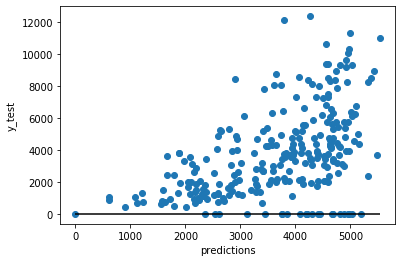

In [24]:
predictions = model.predict(X_test)
predictions = np.array([0 if p < 0 else p for p in predictions])
# Plot Residuals
plt.xlabel("predictions")
plt.ylabel("y_test")
plt.scatter(predictions, y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5705657.256145541
R-squared (R2 ): 0.22972981720914487


In [19]:
### Random tree classification

# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree

# rf = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=63)
# rf = rf.fit(X_train, y_train)
# print(f"Training Data Score: {rf.score(X_train, y_train)}")
# print(f"Testing data score: {rf.score(X_test_scaled,y_test)}")

In [20]:
# sorted(zip(rf.feature_importances_, feature_names), reverse=True)

### Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [21]:
model.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [25]:
### Create the GridSearchCV model
# from sklearn.model_selection import GridSearchCV
# param_grid = {'max_depth': [2, 4, 6]}
# grid = GridSearchCV(rf, param_grid, verbose=3)

In [26]:
# Train the model with GridSearch
# grid.fit(X_train_scaled, y_train)

In [28]:
# print(grid.best_params_)
# print(grid.best_score_)

In [30]:
# # Calculate classification report
# from sklearn.metrics import classification_report
# predictions = model.predict(X_test_scaled)
# print(classification_report(y_test, predictions))

# Save the Model

In [31]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'pollen_multi_SPI_Colton.sav'
joblib.dump(model, filename)

['pollen_multi_SPI_Colton.sav']